# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.1'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
#define the path of the main folder
path = r'/Users/gil/Downloads/World Happiness'

# Import dataset

In [5]:
#import combined_data_checked.csv
df_combined = pd.read_csv(os.path.join(path, 'Data', 'Prepared data', 'combined_data_checked.csv'), index_col = False)


In [6]:
#check the data
df_combined.head()

,Unnamed: 0,Country or region,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom to make life choices,Generosity,Trust (Government Corruption),Financial status,Government status
0,0,Switzerland,2015,1,7.6,1.4,1.3,0.9,0.7,0.3,0.4,Financially well-off,High government trust
1,1,Iceland,2015,2,7.6,1.3,1.4,0.9,0.6,0.4,0.1,Financially average,Low government trust
2,2,Denmark,2015,3,7.5,1.3,1.4,0.9,0.6,0.3,0.5,Financially average,High government trust
3,3,Norway,2015,4,7.5,1.5,1.3,0.9,0.7,0.3,0.4,Financially well-off,High government trust
4,4,Canada,2015,5,7.4,1.3,1.3,0.9,0.6,0.5,0.3,Financially average,Average government trust


# 2. Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.


In [7]:
# Create subset including the necessary variables
df_combined_subset = df_combined[['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom to make life choices','Generosity']]

In [8]:
#check the subset
df_combined_subset

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom to make life choices,Generosity
0,1,7.6,1.4,1.3,0.9,0.7,0.3
1,2,7.6,1.3,1.4,0.9,0.6,0.4
2,3,7.5,1.3,1.4,0.9,0.6,0.3
3,4,7.5,1.5,1.3,0.9,0.7,0.3
4,5,7.4,1.3,1.3,0.9,0.6,0.5
...,...,...,...,...,...,...,...
777,152,3.3,0.4,0.7,0.6,0.6,0.2
778,153,3.2,0.5,0.9,0.5,0.4,0.3
779,154,3.2,0.4,0.5,0.4,0.0,0.2
780,155,3.1,0.0,0.0,0.1,0.2,0.2


# 3. Create a correlation matrix heatmap (colored). Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

In [9]:
# Create a correlation matrix using pandas
df_combined_subset.corr()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom to make life choices,Generosity
Happiness Rank,1.000000,-0.991785,-0.792914,-0.642730,-0.738989,-0.537258,-0.118471
Happiness Score,-0.991785,1.000000,0.785746,0.644757,0.736381,0.550095,0.138925
Economy (GDP per Capita),-0.792914,0.785746,1.000000,0.588130,0.771285,0.342291,-0.004141
Family,-0.642730,0.644757,0.588130,1.000000,0.576075,0.420078,-0.031861
Health (Life Expectancy),-0.738989,0.736381,0.771285,0.576075,1.000000,0.343972,0.021464
Freedom to make life choices,-0.537258,0.550095,0.342291,0.420078,0.343972,1.000000,0.261318
Generosity,-0.118471,0.138925,-0.004141,-0.031861,0.021464,0.261318,1.000000


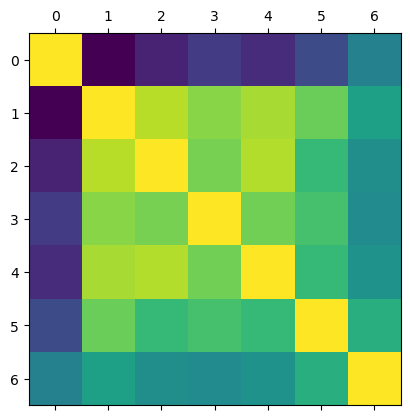

In [10]:
# Create a correlation heatmap using matplotlib
plt.matshow(df_combined_subset.corr())
plt.show()

In [11]:
#current dir
cwd = os.getcwd()
cwd

'/Users/gil/Downloads/World Happiness/Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

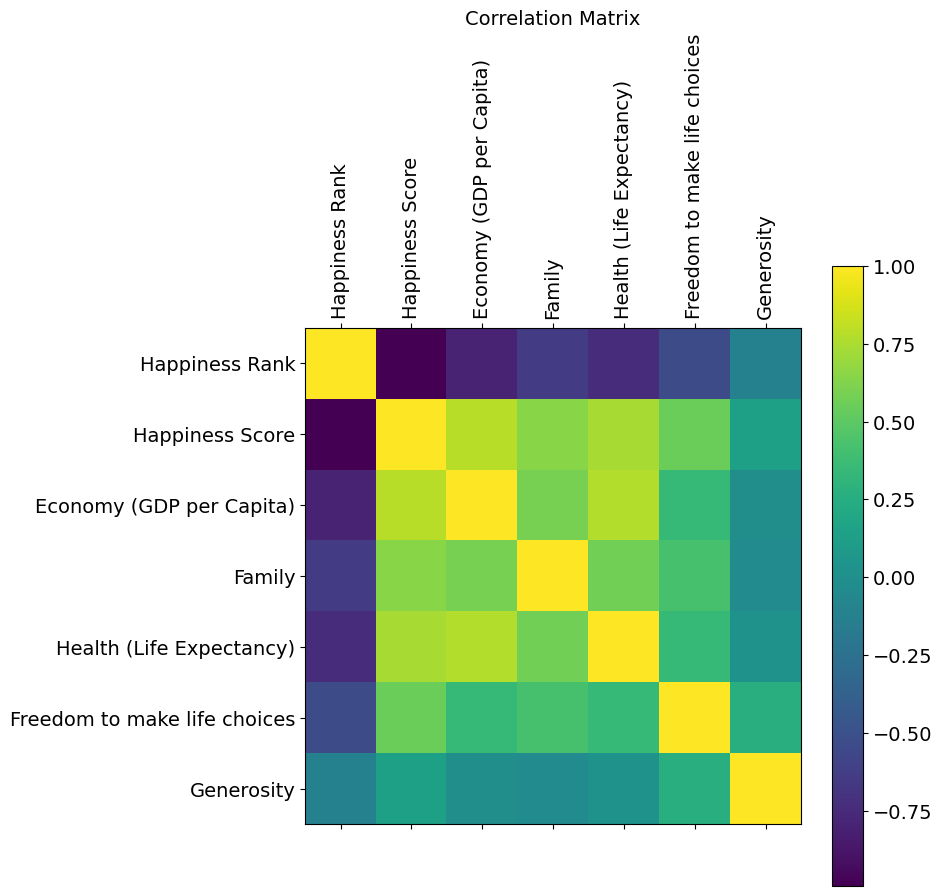

In [12]:
# Add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_combined_subset.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_combined_subset.shape[1]), df_combined_subset.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(df_combined_subset.shape[1]), df_combined_subset.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

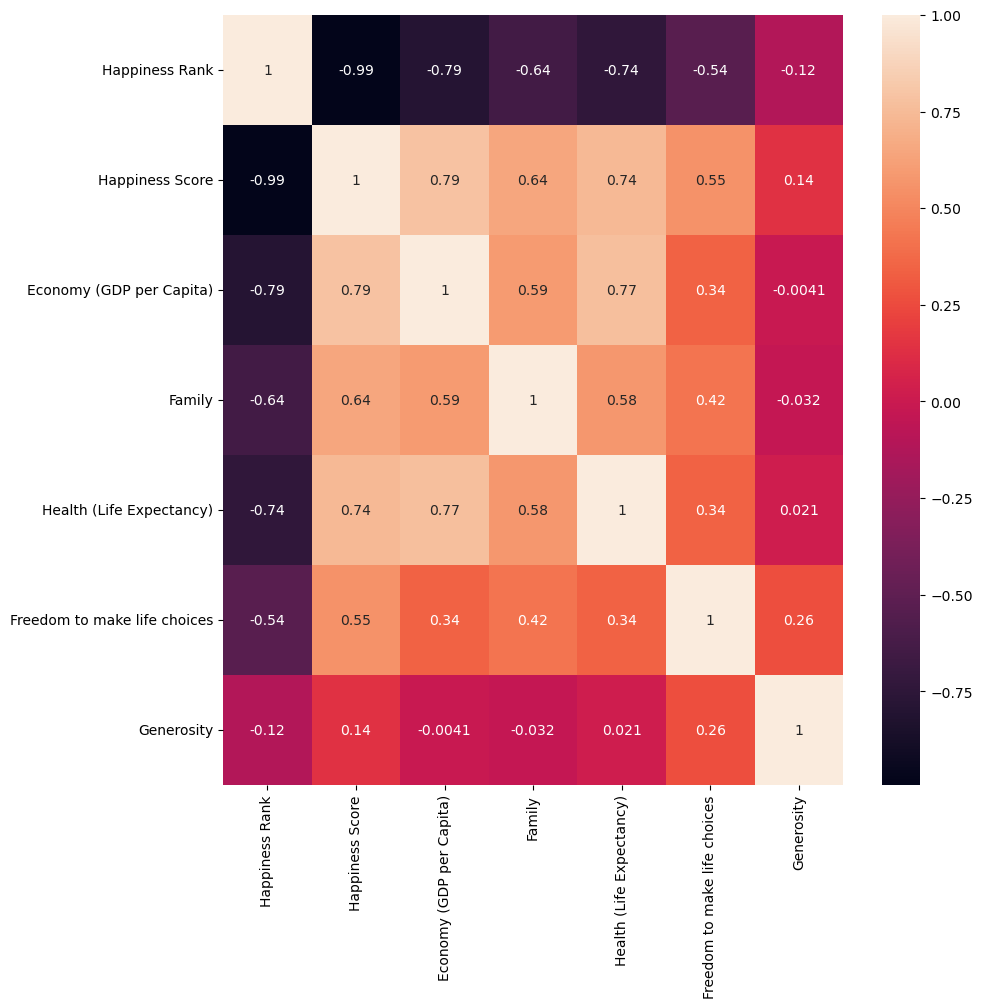

In [13]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_combined_subset.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

From the heatmap we can see that what affects the Happiness Score the most, is the GDP, followed by Health, and then Family. Freedom to make life choices -0.53 indicates medium-strong negative correlation, and Generosity seems to have the least effect on the Happiness Score. 

# 4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships. Discuss the output in a markdown cell.

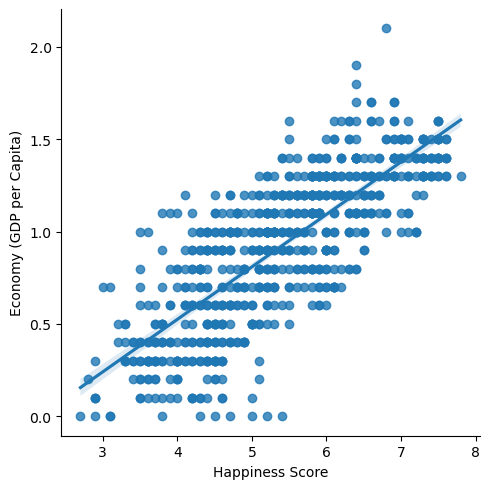

In [14]:
# Create a scatterplot for the "Happiness Score" and "Economy (GDP per Capita)" columns in seaborn
sns.lmplot(x = 'Happiness Score', y = 'Economy (GDP per Capita)', data = df_combined_subset)

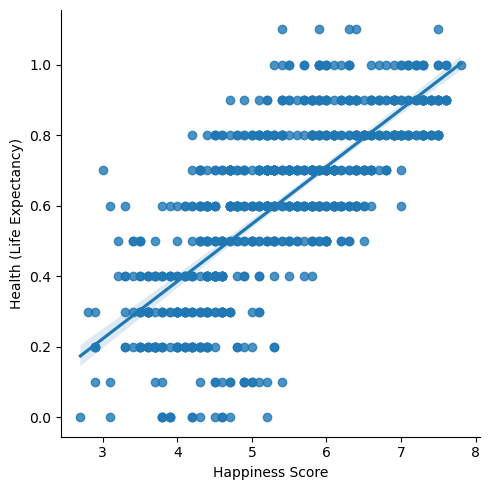

In [15]:
# Create a scatterplot for the "Happiness Score" and "Freedom to make life choices" columns in seaborn
sns.lmplot(x = 'Happiness Score', y = 'Health (Life Expectancy)', data = df_combined_subset)

We can see that both of the graphs look very similar, as there is a strong correlation between the Happiness score and GDP and Health. 

# 5. Create a pair plot of the entire data set. Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

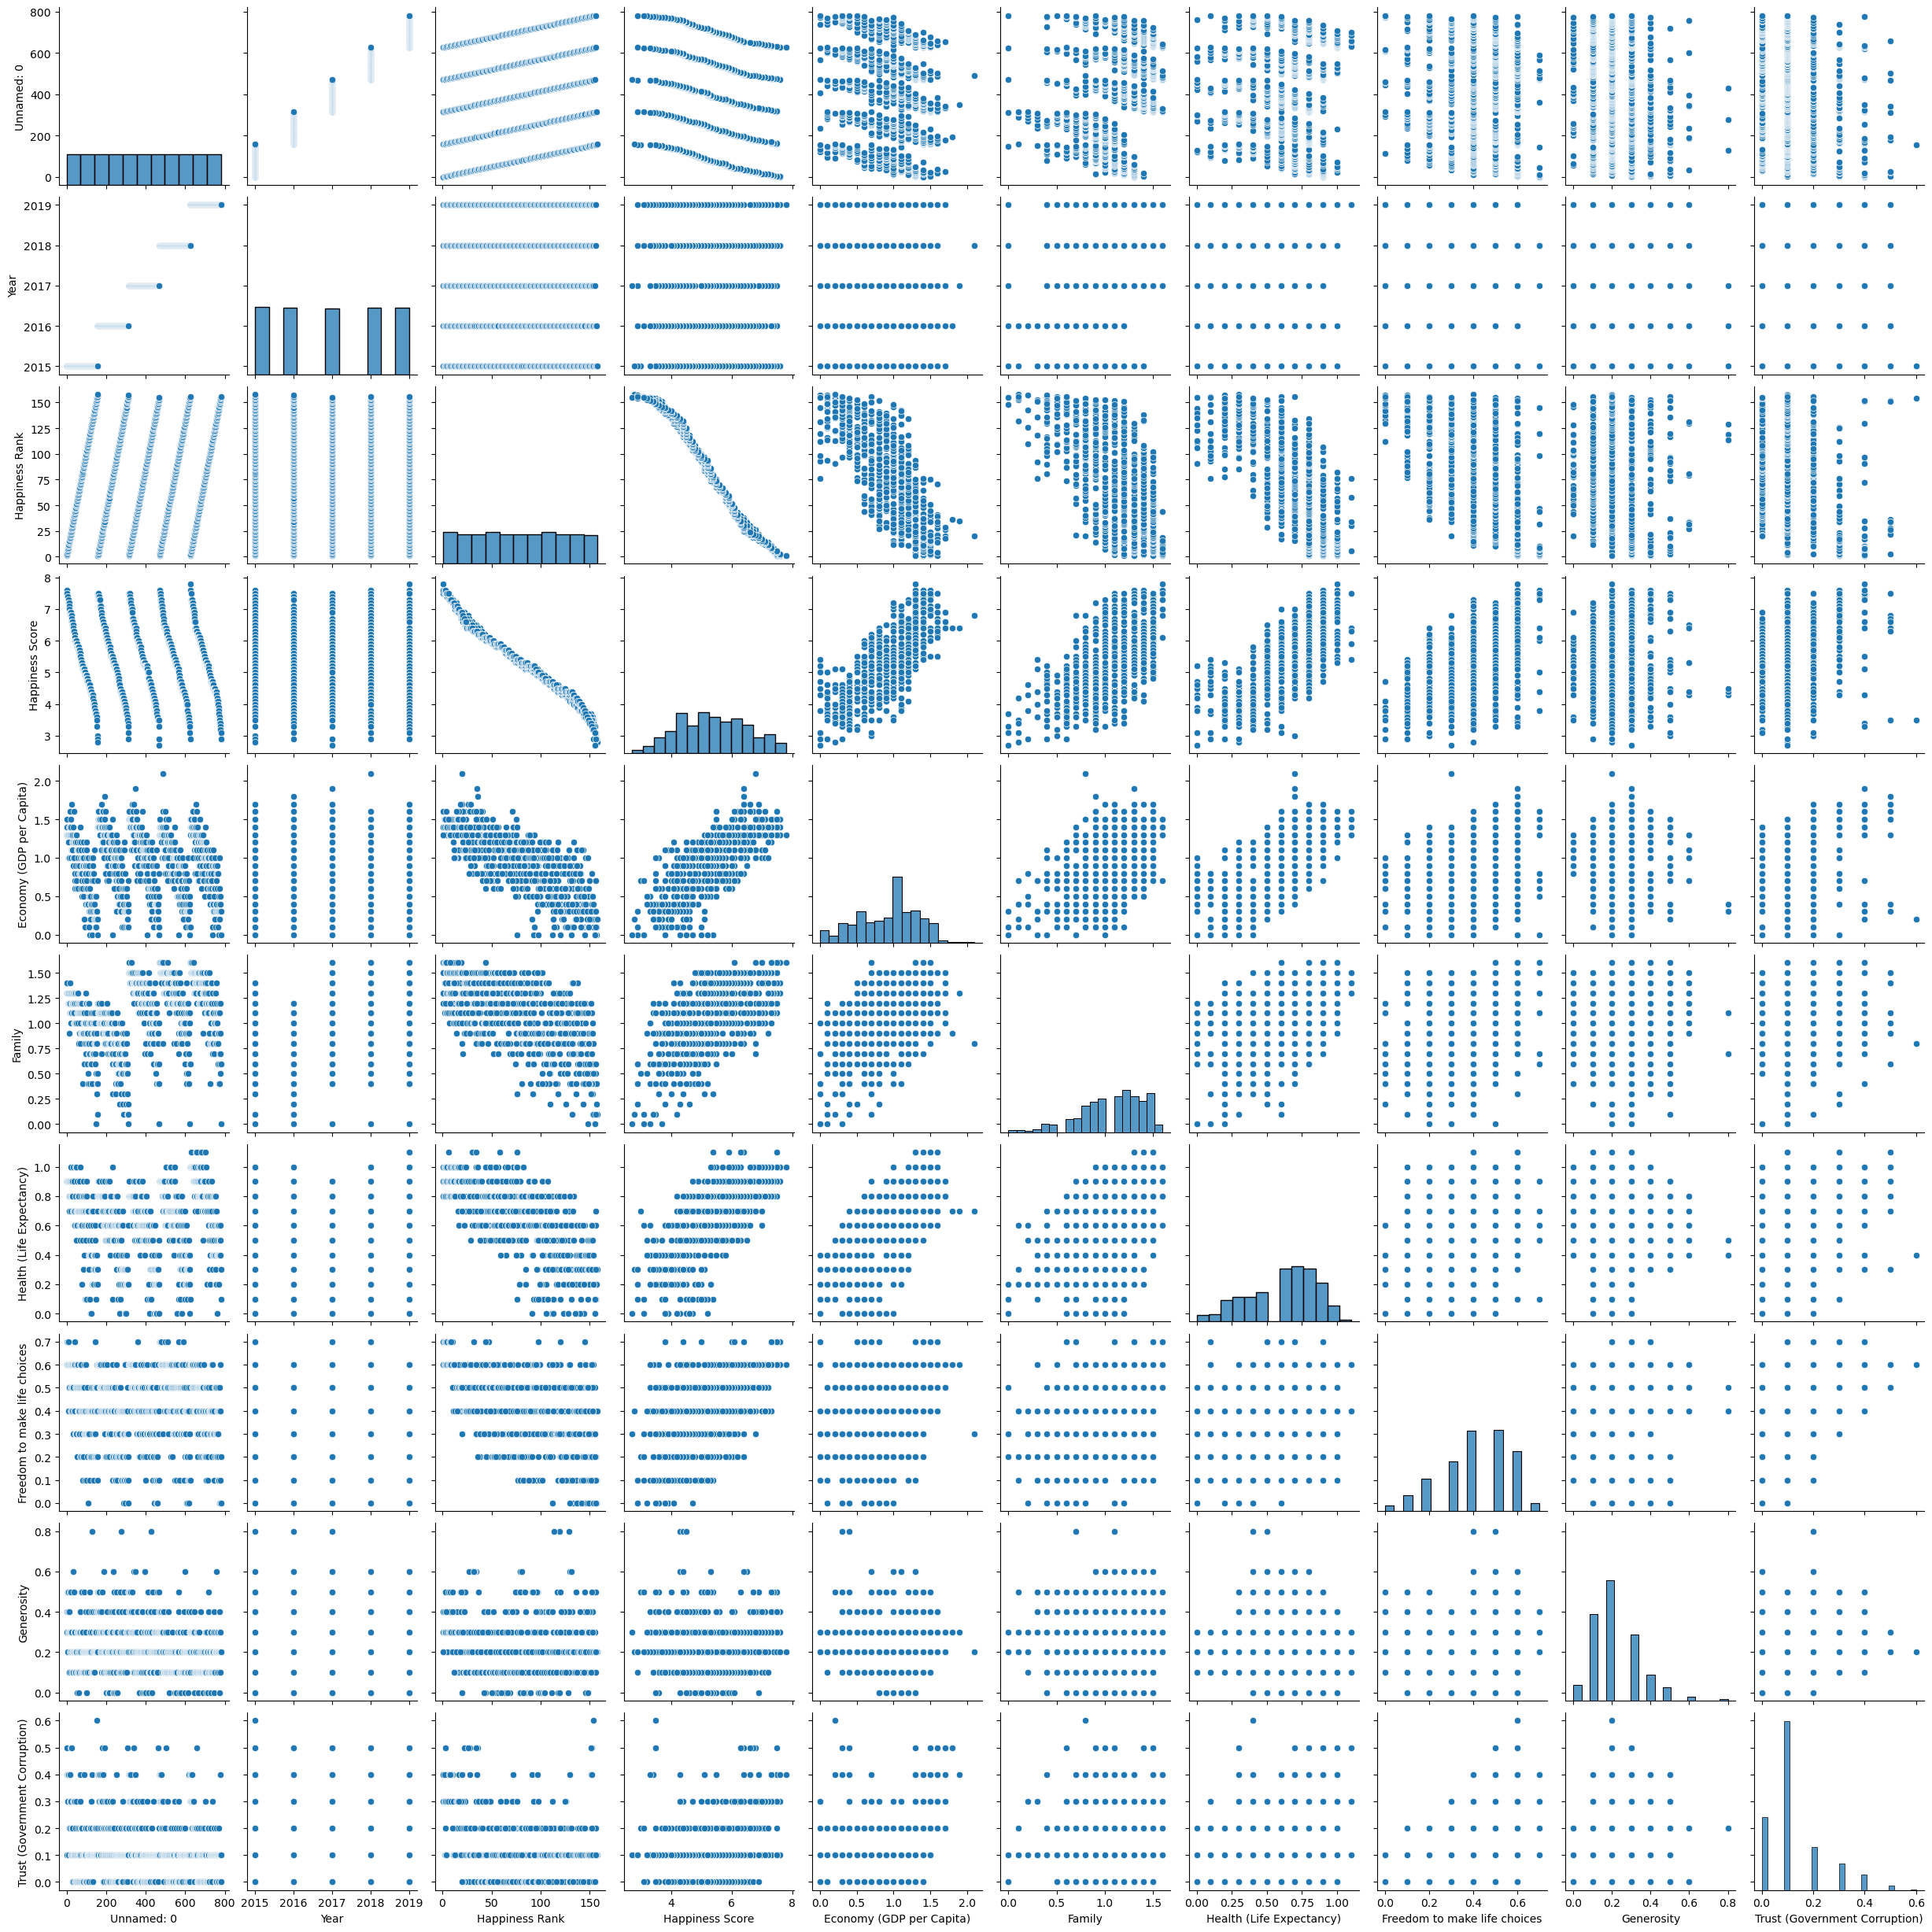

In [17]:
# Create a pair plot 
g = sns.pairplot(df_combined)

There is not a lot of correlation between these variables. The variables I'd like to further examine, are the GDP, Health, Family, Trust and Freedom to make choices, as these all affect the Happiness score, and I'd like to further examine them individually. 

# 6. Create a categorical plot and interpret the results.


<Axes: xlabel='Health (Life Expectancy)', ylabel='Count'>

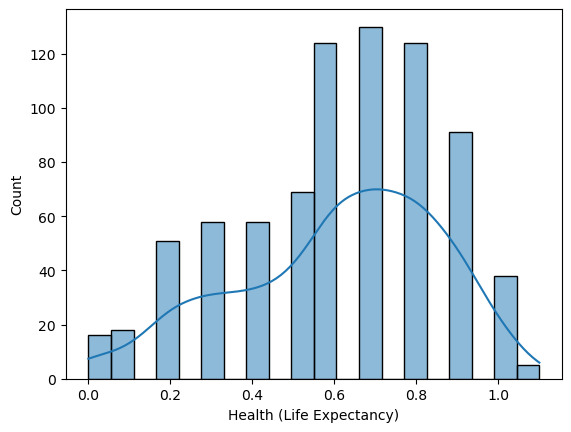

In [18]:
# Create a histogram to visualize the distribution of the variables. 
sns.histplot(df_combined_subset['Health (Life Expectancy)'], bins = 20, kde = True)

In [19]:
df_combined.loc[df_combined['Health (Life Expectancy)'] < 0.3, 'Health level'] = 'Not healthy'
df_combined.loc[(df_combined['Health (Life Expectancy)'] >= 0.3) & (df_combined['Health (Life Expectancy)'] < 0.6), 'Health level'] = 'Moderately healthy'
df_combined.loc[df_combined['Health (Life Expectancy)'] >= 0.6, 'Health level'] = 'Very healthy'

In [20]:
# check the column
df_combined['Health level'].value_counts(dropna = False)

Very healthy          512
Moderately healthy    185
Not healthy            85
Name: Health level, dtype: int64

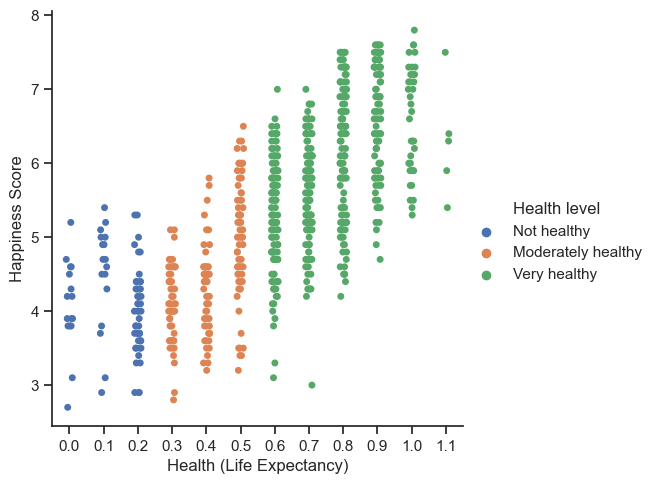

In [21]:
# Create a categorical plot in seaborn using a Financial status variable

sns.set(style="ticks")
g = sns.catplot(x="Health (Life Expectancy)", y="Happiness Score", hue="Health level", data=df_combined)

We can see from the plot what we already knew - countries with good healthcare, are happier than countries with poor/non-existent healthcare. 

# 7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

1. Which are the happiest/least happy countries? 
2. Are there any significant changes visible throughout the years? Did some countries become more/less happy over the years? 
3. Which of the variables seems to have the biggest impact on the happiness score? - GDP and Health 
4. Is GDP a strong indicator of a country’s happiness? - Definitely yes 
5. Out of the 5 happiest/least happy countries, what are the main factors driving the scores? - GDP and Health 
6. Is happiness regional? Do neighboring countries have similar happiness scores? 
7. Is the location of the country (climate) affecting the happiness level? 
8. Are certain religions happier than others? 




# 8, Define any hypotheses that you can at this point. You’ll be testing these later on.


1. The richer the country, the happier it is. 
2. The better healthcare is, the happier the country is. 
3. If a country's neighboors' happiness score is low, that country's score will likely be affected by that, and be low as well. 


In [22]:
#export df_combined
df_combined.to_csv(os.path.join(path, 'Data', 'Prepared data', 'combined_data_checked_2.csv'))